# Лабораторна робота 3. OpenCV. Просторові методи обробки зображень І. Градаційні перетворення і гістограмні методи (short version)

__Мета:__ знайомство з поелементними і гістограмними просторовими методами обробки зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

# Хід роботи

1.Виконати петворення фото у Негатив.

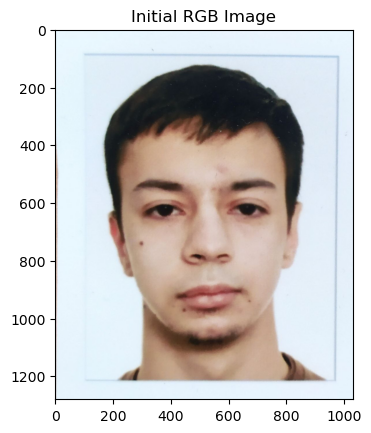

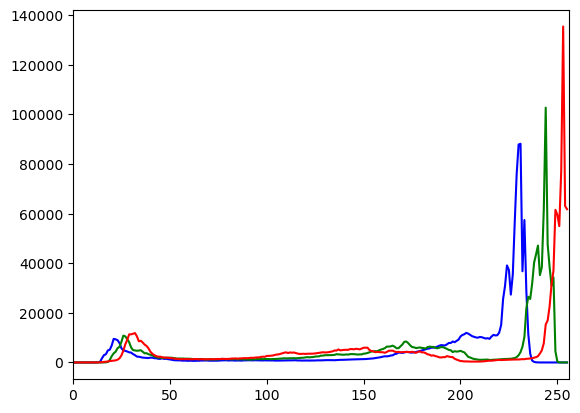

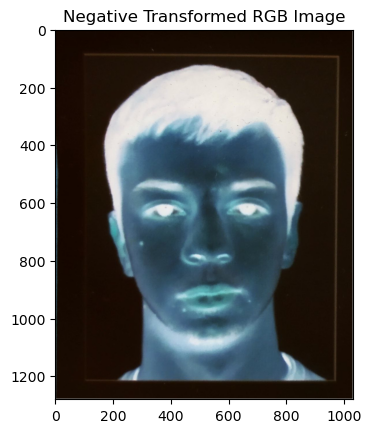

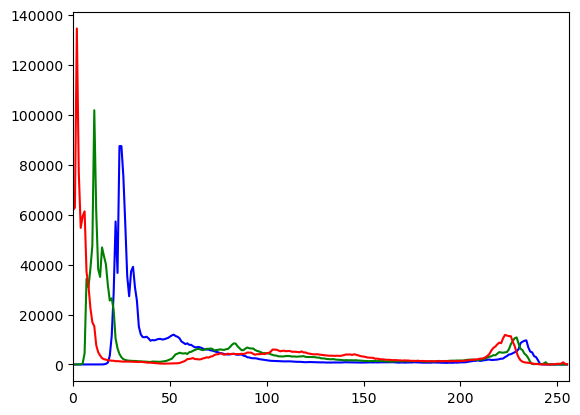

In [2]:
import cv2
import matplotlib.pyplot as plt

img_rgb = cv2.imread('img/photof.jpg', cv2.IMREAD_COLOR)  
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Initial RGB Image')
plt.show()
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img_rgb],
                         [i], None,
                         [256],
                         [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()
height, width, _ = img_rgb.shape
for i in range(0, height - 1):
    for j in range(0, width - 1):
        pixel = img_rgb[i, j]
        pixel[0] = 255 - pixel[0]
        pixel[1] = 255 - pixel[1]
        pixel[2] = 255 - pixel[2]

        img_rgb[i, j] = pixel
plt.imshow(img_rgb)
plt.title('Negative Transformed RGB Image')
plt.show()
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img_rgb],
                         [i], None,
                         [256],
                         [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()


Градаційне перетворення для отримання негативу зображення використовується для інверсії яскравості пікселів, щоб створити зображення з оберненими кольорами. Формула градаційного перетворення для отримання негативу:

$G(x,y)=L−1−F(x,y)$

де:
- $G(x,y)$ - нова яскравість пікселя після градаційного перетворення,
- $F(x,y)$ - початкова яскравість пікселя,
- $L$ - максимальна можлива яскравість пікселя (зазвичай 256 для 8-бітових зображень).

Ця формула виконує віднімання початкової яскравості пікселя з максимально можливої яскравості, і потім віднімає результат від 1. Це призводить до обернення значень яскравості та отримання негативного зображення.

2.Виконати логарифмічні перетворення з фотографією

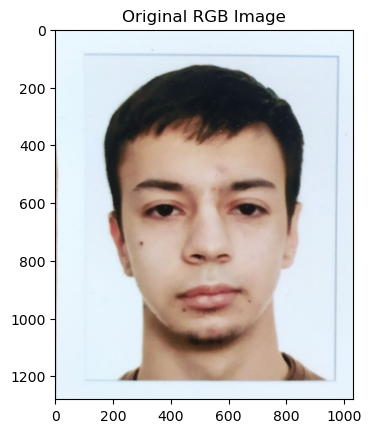

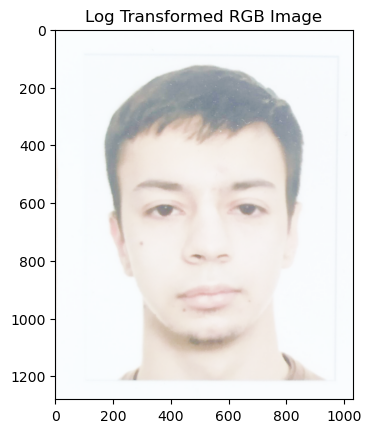

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img/photof.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
epsilon = 1e-5
log_image = c * (np.log(image_rgb + epsilon))
log_image[np.isnan(log_image)] = 0
log_image[np.isinf(log_image)] = 0
log_image = np.clip(log_image, 0, 255)
log_image = np.array(log_image, dtype=np.uint8)
plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.show()
plt.imshow(log_image)
plt.title('Log Transformed RGB Image')
plt.show()



Логарифмічне перетворення використовується для розширення динамічного діапазону яскравості зображення та підвищення видимості деталей в темних областях. Формула логарифмічного градаційного перетворення виглядає наступним чином:

$G(x,y)=c⋅log(1+F(x,y))$

де:

- $G(x,y)$ - нова яскравість пікселя після логарифмічного градаційного перетворення,
- $F(x,y)$ - початкова яскравість пікселя,
- $c$ - константа, яка визначає ступінь логарифмічного перетворення(зазвичай $с≈\frac{L−1}{log(L)}$ де 
$L$ - максимальна можлива яскравість пікселя).

Ця формула застосовує логарифм до кожного значення яскравості пікселя, збільшуючи контрастність в темних областях зображення та зменшуючи її в світлих.

3.Виконати степеневу(гамма-коеркцію) з фотографією

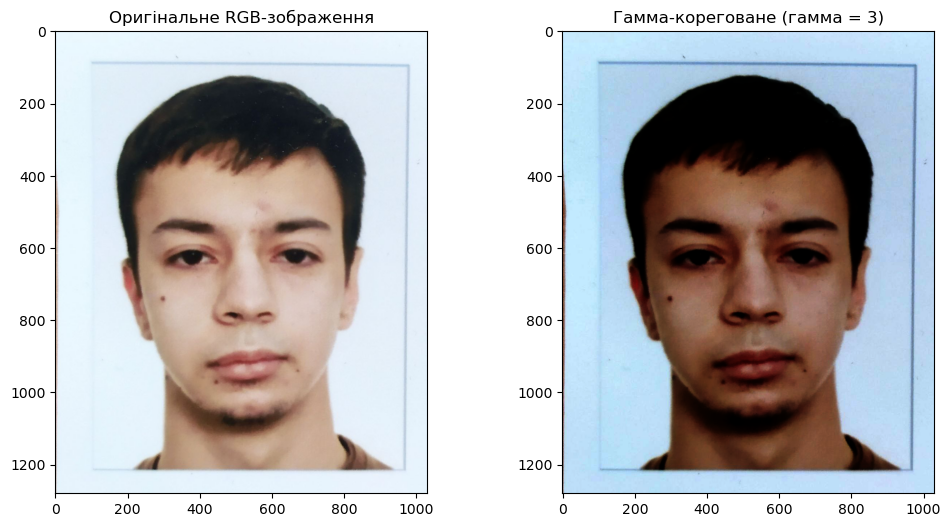

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('img/photof.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gamma = 3   

gamma_corrected = np.power(image_rgb / 255.0, gamma)
gamma_corrected = np.uint8(gamma_corrected * 255.0)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image_rgb)
axes[0].set_title('Оригінальне RGB-зображення')

axes[1].imshow(gamma_corrected)
axes[1].set_title(f'Гамма-кореговане (гамма = {gamma})')

plt.show()



Степенева (гамма-коеркція) трансформація використовується для корекції гамми або зміни контрасту в зображенні. Формула гамма-коеркції виглядає наступним чином:

$G(x,y)=c⋅[F(x,y)]^γ$

де:
- $G(x,y)$ - нова яскравість пікселя після гамма-коеркції,
- $F(x,y)$ - початкова яскравість пікселя,
- $c$ - константа масштабування,
- $γ$ - параметр гамми (зазвичай від 0,1 до 5).

Ця формула підносить кожне значення яскравості пікселя до ступеня γ, тим самим коригуючи контраст та яскравість зображення. Зменшення значення гамми (<1) зменшує контраст, тоді як збільшення значення гамми (>1) збільшує контраст.

4.Виконати соляризацію зображення

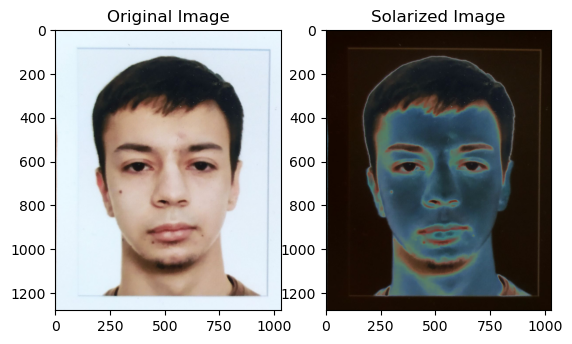

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img/photof.jpg')
b, g, r = cv2.split(image)
threshold = 128
solarized_b = np.where(b < threshold, b, 255 - b)
solarized_g = np.where(g < threshold, g, 255 - g)
solarized_r = np.where(r < threshold, r, 255 - r)

solarized_image = cv2.merge((solarized_b, solarized_g, solarized_r))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(solarized_image, cv2.COLOR_BGR2RGB))
plt.title('Solarized Image')

plt.show()



Соляризація зображення - це художній ефект, який створюється зміною яскравості пікселів в областях, де вони перетинають певний поріг. Цей ефект призводить до того, що темні та світлі області стають яскравими, тоді як середні відтінки залишаються без змін.

$G(x,y)=L−1−∣F(x,y)−\frac{L−1}{2}∣$

де:
- $G(x,y)$ - нова яскравість пікселя після соляризації,
- $F(x,y)$ - початкова яскравість пікселя,
- $L$ - максимальна можлива яскравість пікселя (зазвичай 256 для 8-бітових зображень).

Ця формула застосовує соляризацію шляхом створення відзеркаленого ефекту відносно середнього відтінку (половина максимальної яскравості). Такий підхід може забезпечити ефект соляризації в околицях контурів об'єктів на зображенні.


5.Застосувати еквалізацію гістограми до зображення

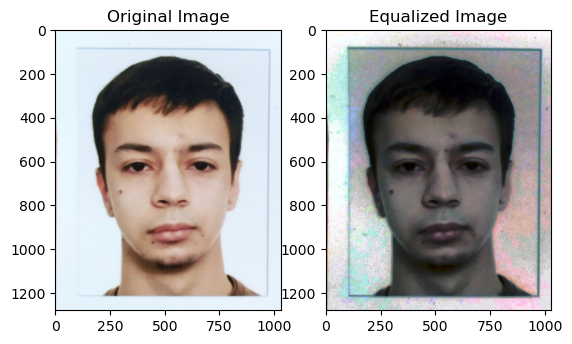

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('img/photof.jpg')
b, g, r = cv2.split(image)
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)


equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.show()



6.Виконати оцінку гістограми кольорового зображення

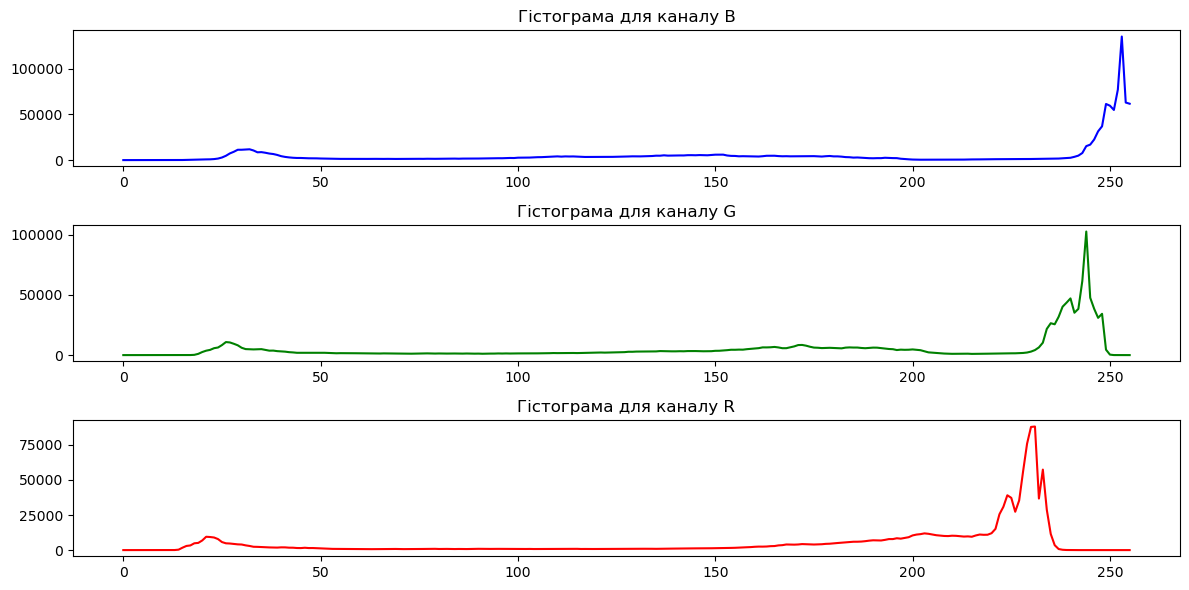

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('img/photof.jpg')
b, g, r = cv2.split(image)
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(hist_b, color='blue')
plt.title('Гістограма для каналу B')

plt.subplot(3, 1, 2)
plt.plot(hist_g, color='green')
plt.title('Гістограма для каналу G')

plt.subplot(3, 1, 3)
plt.plot(hist_r, color='red')
plt.title('Гістограма для каналу R')

plt.tight_layout()
plt.show()


Аналіз гістограм для кожного кольорового каналу (синього, зеленого, червоного) дозволяє визначити діапазони яскравості кожного каналу. Високі піки в гістограмі можуть вказувати на насиченість певного діапазону яскравості, тоді як широкі гістограми можуть свідчити про широкий розподіл. Величина та форма гістограми можуть слугувати показниками контрастності та динаміки зображення.

Аналіз гістограм також може допомогти визначити, чи є експозиція зображення оптимальною. Затемнення або пересичення гістограми на краях може свідчити про недостатню експозицію або пересичення.

На підставі гістограм можна виробити рішення щодо корекції зображення. Наприклад, еквалізація гістограми може бути використана для покращення контрасту та збалансування яскравості каналів.

## Контрольні запитання

1.У чому полягає сенс градаційних перетворень?

Градаційні перетворення, також відомі як тонування або цінові преобразовання, використовуються для зміни та покращення контрасту в зображенні шляхом впливу на яскравість та розподіл тонів. Основний сенс градаційних перетворень полягає в тому, щоб адаптувати яскравість та контрастність зображення, підвищуючи або зменшуючи інтенсивність пікселів відповідно до конкретних потреб або естетичних вимог.

Ось деякі з них:

- контраст: Збільшення або зменшення контрасту може зробити зображення більш насиченим або менш насиченим, відзначаючи або заглушуючи деталі.

- яскравість: Зміна яскравості дозволяє регулювати загальний рівень світла на зображенні.

- насиченість: Зміна насиченості впливає на інтенсивність кольорів на зображенні, дозволяючи зробити їх більш яскравими або приглушеними.

- тон і відтінок: Градаційні перетворення також можуть впливати на тон та відтінок, дозволяючи коригувати колірний баланс.

- експозиція: Регулювання експозиції дозволяє контролювати, наскільки світле чи темне стане зображення.

2.На чому ґрунтуються гістограмні методи?

Гістограмні методи базуються на аналізі гістограм, які представляють розподіл інтенсивностей пікселів у зображенні. Гістограма грунтується на ідеї визначення кількості пікселів для кожного рівня яскравості, що утворює стовпчик гістограми. Основні аспекти гістограмних методів включають:

- контраст і Яскравість: Гістограми надають інформацію про розподіл тонів у зображенні, дозволяючи оцінити контрастність та яскравість. Високі піки вказують на насиченість конкретних тонів, тоді як широкі гістограми можуть свідчити про розподіл інтенсивностей.

- експозиція та Пересичення: Аналіз гістограми дозволяє визначити, чи є експозиція зображення оптимальною. Затемнення або пересичення гістограми може вказувати на недостатню або перебільшену експозицію.

- кількість Кольорів: Гістограмні методи можуть вказувати на кількість різних кольорів або тонів у зображенні. Це важливо для аналізу колірного спектру та балансу кольорів.

- контроль Контура та Деталей: Зміни в гістограмі можуть вказувати на контурні особливості та наявність деталей у зображенні. Великі перепади в гістограмі можуть свідчити про наявність контурів та текстур.

- гамма-корекція: Гістограмні методи часто використовуються для корекції гамми, де аналіз гістограми може вказати на потребу у регулюванні яскравості та контрастності для виправлення нелінійностей відтворення кольорів.

- гістограмні методи є важливим інструментом в обробці зображень, допомагаючи визначати та коригувати різні параметри зображення для поліпшення його візуальної якості та вираженості.

##  References

1.https://wiki.tntu.edu.ua/%D0%93%D1%96%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BD%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7 - Гістограмний аналіз

2.https://uk.wikipedia.org/wiki/%D0%A1%D0%BE%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%8F - Соляризація зображення